In [19]:
!pip install nltk


In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

import warnings 
warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sudwa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sudwa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sudwa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Load and EDA dataset

In [38]:
df = pd.read_json('news_category.json', lines=True)
df.head()


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [23]:
df.columns


Index(['link', 'headline', 'category', 'short_description', 'authors', 'date'], dtype='object')

In [24]:
df.isnull().sum()


link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

In [25]:
df['category'].unique()


array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS',
       'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE',
       'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST',
       'FIFTY', 'ARTS', 'DIVORCE'], dtype=object)

In [26]:
df['category'].value_counts()


category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATI

In [27]:
# worldpost and the worldpost
df.category = df.category.map(lambda x: "WORLDPOST" if x == "THE WORLDPOST" else x)


In [28]:
df['headline'][1]


'American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video'

In [29]:
df['short_description'][1]


"He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles."

### Pre-Process

In [41]:
df['news']=df['headline']+ " "+df['short_description']
#df.head()
df['news'][1]


"American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles."

In [42]:
#df=df[['news', 'category']]
#df.head(5)


<Axes: xlabel='category'>

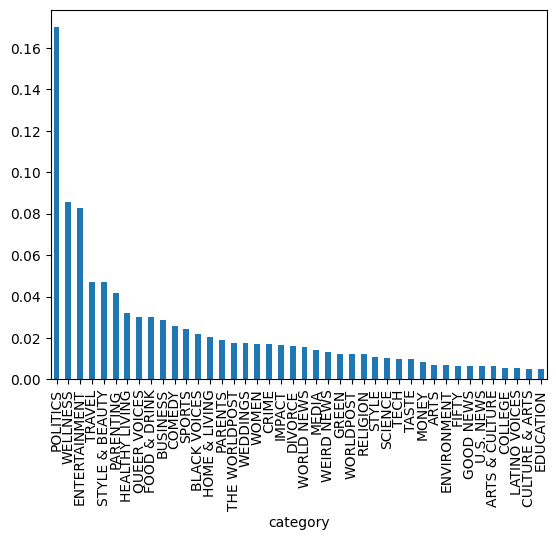

In [43]:
# check target balance
df['category'].value_counts(normalize = True).plot.bar()


In [44]:
df['news'][0]


'Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.'

In [2]:
# clean the text data using regex and data cleaning function
# create a list text
import string

my_list=[  'news','new', 'amp','time', 'photos',  'get','make','e', 'u','o','s', 'say']
def clean_text(text):
    r = re.sub('[^a-zA-Z]', ' ', text)
    r= re.sub("'", "",text)
    r=re.sub("(\d|\W)+"," ",text)
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [word for word in r if word not in list(string.punctuation) and word not in my_list]
    r = [lemmatizer.lemmatize(word) for word in r]
    return ' '.join(r)


In [46]:
clean_text(df.news[0])


'million american roll sleeve omicron targeted covid booster health expert said early predict whether demand would match million dos booster ordered fall'

In [47]:
# Dataset too large
df=df[::30]
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6985 entries, 0 to 209520
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   link               6985 non-null   object        
 1   headline           6985 non-null   object        
 2   category           6985 non-null   object        
 3   short_description  6985 non-null   object        
 4   authors            6985 non-null   object        
 5   date               6985 non-null   datetime64[ns]
 6   news               6985 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 382.1+ KB


In [49]:
df.category.value_counts()


category
POLITICS          1157
WELLNESS           598
ENTERTAINMENT      563
STYLE & BEAUTY     336
TRAVEL             334
PARENTING          302
QUEER VOICES       232
HEALTHY LIVING     205
BUSINESS           198
FOOD & DRINK       198
COMEDY             191
BLACK VOICES       177
SPORTS             172
HOME & LIVING      168
PARENTS            148
THE WORLDPOST      126
WORLD NEWS         115
WEDDINGS           110
IMPACT             109
WEIRD NEWS         108
DIVORCE            108
CRIME              102
MEDIA              101
GREEN              100
WOMEN               96
RELIGION            88
WORLDPOST           87
STYLE               75
TECH                68
TASTE               68
SCIENCE             68
MONEY               51
COLLEGE             48
ARTS & CULTURE      47
ENVIRONMENT         46
FIFTY               45
U.S. NEWS           45
GOOD NEWS           44
ARTS                41
LATINO VOICES       41
CULTURE & ARTS      38
EDUCATION           31
Name: count, dtype: int64

In [50]:
df['clean_news']=df['news'].apply(clean_text )


In [51]:
df.head(5)


,link,headline,category,short_description,authors,date,news,clean_news
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,Over 4 Million Americans Roll Up Sleeves For O...,million american roll sleeve omicron targeted ...
30,https://www.huffpost.com/entry/europe-britain-...,Biden Says Queen's Death Left 'Giant Hole' For...,POLITICS,"U.S. President Joe Biden, in London for the fu...","Darlene Superville, AP",2022-09-18,Biden Says Queen's Death Left 'Giant Hole' For...,biden say queen death left giant hole royal fa...
60,https://www.huffpost.com/entry/tim-scott-senat...,Sen. Tim Scott Downplays Electability Concerns...,POLITICS,"""Who we have on the field is who we’re gonna p...",Marita Vlachou,2022-09-12,Sen. Tim Scott Downplays Electability Concerns...,sen tim scott downplays electability concern s...
90,https://www.huffpost.com/entry/muslims-tv-char...,"Muslims Only Make Up 1% Of Characters On TV, S...",ENTERTAINMENT,In most of the 200 scripted shows that researc...,Rowaida Abdelaziz,2022-09-07,"Muslims Only Make Up 1% Of Characters On TV, S...",muslim character tv study find scripted show r...
120,https://www.huffpost.com/entry/nasa-artemis-ro...,NASA Aims For Saturday Launch Of New Moon Rock...,U.S. NEWS,The inaugural flight of the 322-foot Artemis I...,"Marcia Dunn, AP",2022-09-02,NASA Aims For Saturday Launch Of New Moon Rock...,nasa aim saturday launch moon rocket fixing fu...


In [52]:
df.to_csv('cleans_news_category.csv')


In [3]:
data = pd.read_csv('cleans_news_category.csv')
data.head()


,Unnamed: 0,link,headline,category,short_description,authors,date,news,clean_news
0,0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,Over 4 Million Americans Roll Up Sleeves For O...,million american roll sleeve omicron targeted ...
1,30,https://www.huffpost.com/entry/europe-britain-...,Biden Says Queen's Death Left 'Giant Hole' For...,POLITICS,"U.S. President Joe Biden, in London for the fu...","Darlene Superville, AP",2022-09-18,Biden Says Queen's Death Left 'Giant Hole' For...,biden say queen death left giant hole royal fa...
2,60,https://www.huffpost.com/entry/tim-scott-senat...,Sen. Tim Scott Downplays Electability Concerns...,POLITICS,"""Who we have on the field is who we’re gonna p...",Marita Vlachou,2022-09-12,Sen. Tim Scott Downplays Electability Concerns...,sen tim scott downplays electability concern s...
3,90,https://www.huffpost.com/entry/muslims-tv-char...,"Muslims Only Make Up 1% Of Characters On TV, S...",ENTERTAINMENT,In most of the 200 scripted shows that researc...,Rowaida Abdelaziz,2022-09-07,"Muslims Only Make Up 1% Of Characters On TV, S...",muslim character tv study find scripted show r...
4,120,https://www.huffpost.com/entry/nasa-artemis-ro...,NASA Aims For Saturday Launch Of New Moon Rock...,U.S. NEWS,The inaugural flight of the 322-foot Artemis I...,"Marcia Dunn, AP",2022-09-02,NASA Aims For Saturday Launch Of New Moon Rock...,nasa aim saturday launch moon rocket fixing fu...


In [4]:
data.isnull().sum()


Unnamed: 0              0
link                    0
headline                0
category                0
short_description     678
authors              1259
date                    0
news                    0
clean_news              1
dtype: int64

In [5]:
data=data.dropna()


In [6]:
data.isnull().sum()


Unnamed: 0           0
link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
news                 0
clean_news           0
dtype: int64

### Feature Extraction

In [7]:
# Now encode the data
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['label_category'] = label.fit_transform(data['category'])
data.head()


,Unnamed: 0,link,headline,category,short_description,authors,date,news,clean_news,label_category
0,0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,Over 4 Million Americans Roll Up Sleeves For O...,million american roll sleeve omicron targeted ...,35
1,30,https://www.huffpost.com/entry/europe-britain-...,Biden Says Queen's Death Left 'Giant Hole' For...,POLITICS,"U.S. President Joe Biden, in London for the fu...","Darlene Superville, AP",2022-09-18,Biden Says Queen's Death Left 'Giant Hole' For...,biden say queen death left giant hole royal fa...,24
2,60,https://www.huffpost.com/entry/tim-scott-senat...,Sen. Tim Scott Downplays Electability Concerns...,POLITICS,"""Who we have on the field is who we’re gonna p...",Marita Vlachou,2022-09-12,Sen. Tim Scott Downplays Electability Concerns...,sen tim scott downplays electability concern s...,24
3,90,https://www.huffpost.com/entry/muslims-tv-char...,"Muslims Only Make Up 1% Of Characters On TV, S...",ENTERTAINMENT,In most of the 200 scripted shows that researc...,Rowaida Abdelaziz,2022-09-07,"Muslims Only Make Up 1% Of Characters On TV, S...",muslim character tv study find scripted show r...,10
4,120,https://www.huffpost.com/entry/nasa-artemis-ro...,NASA Aims For Saturday Launch Of New Moon Rock...,U.S. NEWS,The inaugural flight of the 322-foot Artemis I...,"Marcia Dunn, AP",2022-09-02,NASA Aims For Saturday Launch Of New Moon Rock...,nasa aim saturday launch moon rocket fixing fu...,35


In [8]:
data['label_category'].value_counts()


label_category
24    953
10    448
38    421
34    271
30    254
22    208
25    166
16    147
3     147
5     142
13    141
17    138
2     134
23    132
28    126
40     99
18     90
33     79
39     75
20     71
37     71
6      62
15     61
31     61
26     55
36     53
32     51
29     51
41     50
8      48
1      47
21     44
35     39
19     37
4      35
12     33
27     32
14     31
9      25
11     25
0      24
7      23
Name: count, dtype: int64

In [9]:
# Vectorizing the cleaned columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words="english")
X = tfidf.fit_transform(data.clean_news).toarray()


In [10]:
import joblib
joblib.dump(tfidf, 'tfidf.pkl')   #tfidf vectorizer


['tfidf.pkl']

In [11]:
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
y = data['category']
y


0            U.S. NEWS
1             POLITICS
2             POLITICS
3        ENTERTAINMENT
4            U.S. NEWS
             ...      
6977    STYLE & BEAUTY
6978            TRAVEL
6979    STYLE & BEAUTY
6982            SPORTS
6983           SCIENCE
Name: category, Length: 5200, dtype: object

In [13]:
data['label_category'].sort_values()


3501     0
4152     0
4423     0
3618     0
4130     0
        ..
3937    41
3217    41
3979    41
3829    41
3425    41
Name: label_category, Length: 5200, dtype: int32

### Model Selection

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape
     

((4160, 5000), (1040, 5000), (4160,), (1040,))

### Training Model

In [71]:
pip install xgboost



  Using cached xgboost-2.0.3-py3-none-win_amd64.whl.metadata (2.0 kB)
Using cached xgboost-2.0.3-py3-none-win_amd64.whl (99.8 MB)


In [15]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics


In [16]:
models=[SVC(),
        LinearSVC(),
        KNeighborsClassifier(),
        MultinomialNB(),
        DecisionTreeClassifier(max_depth = 5),
        RandomForestClassifier(n_estimators = 100, random_state = 42 ),
        AdaBoostClassifier(n_estimators = 50, random_state = 42),
        BaggingClassifier(n_estimators = 50, random_state = 42),
        ExtraTreesClassifier(n_estimators = 50, random_state = 42),
        GradientBoostingClassifier(n_estimators = 50, random_state = 42),
        XGBClassifier(n_estimators = 50, random_state = 42),
       ]


In [17]:
#basic
#wrap in function
perform_list = [ ]
for model in models:
    #print(model)
    oneVsRest = OneVsRestClassifier(model)
    #print(oneVsRest)
    oneVsRest.fit(X_train, y_train)
    y_pred = oneVsRest.predict(X_test)
    # Performance metrics
    # accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy, oneVsRest)
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')

    # Add performance parameters to list
    # perform_list.append(dict([('Model', model),('Accuracy', round(accuracy, 2)),('Precision', round(precision, 2)),('Recall', round(recall, 2)),('F1', round(f1score, 2))]))
    perform_list.append(dict([('Model', model),('Accuracy', accuracy),('Precision', precision),('Recall', recall),('F1', f1score)]))
    

In [ ]:
newlist=pd.DataFrame(perform_list)
newlist


In [ ]:
svc =  SVC(kernel = "linear")
svc.fit(X_train,y_train)
ypredlinear = svc.predict(X_test)
accuracy_score(ypredlinear,y_test)


In [ ]:
svc =  SVC(kernel = "rbf")
svc.fit(X_train,y_train)
ypredrbf = svc.predict(X_test)
accuracy_score(ypredrbf,y_test)


In [ ]:
svc =  SVC(kernel = "poly")
svc.fit(X_train,y_train)
ypredpoly = svc.predict(X_test)
accuracy_score(ypredpoly,y_test)


In [ ]:
svc =  SVC(kernel = "sigmoid")
svc.fit(X_train,y_train)
ypredsig = svc.predict(X_test)
accuracy_score(ypredsig,y_test)


### Best Model

In [ ]:
modelsvc =  SVC(kernel = "linear")
modelsvc.fit(X_train,y_train)
ypredlinear = modelsvc.predict(X_test)
accuracy_score(ypredlinear,y_test)


In [ ]:
# Classification report
print('CLASSIFICATIION METRICS')
print(metrics.classification_report(y_test, ypredlinear, 
                                    target_names= df['category'].unique()))


In [ ]:
joblib.dump(modelsvc, 'news_classifier_svc.pkl') #classifier


In [ ]:
### Text Classification


### Text Classification

In [ ]:
info=df['clean_text'][900]
print(info)
print(df['category'][900])


In [ ]:
tf=joblib.load('tfidf.pkl')
classi=joblib.load('news_classifier_svc.pkl')


In [ ]:
headlines=[clean_text(info)]
headlines


In [ ]:
y_pred2 = tf.transform(headlines)
model_prediction=y_pred2.toarray()
classi.predict(model_prediction)[0]
